> 问题 3: 请进行数据统计，建立不同国家旅游的网络模型，分析哪两个国家之间的旅游最为频繁？并分析这种频繁关系随时间的变化。

['Switzerland', 'Poland', 'Bahamas', 'Philippines', 'Aruba', 'Ethiopia', 'Puerto Rico', 'Morocco', 'Cyprus', 'Mexico']
Most frequent tourist connection:
Country 1: Armenia
Country 2: United States
Tourists: 24198400


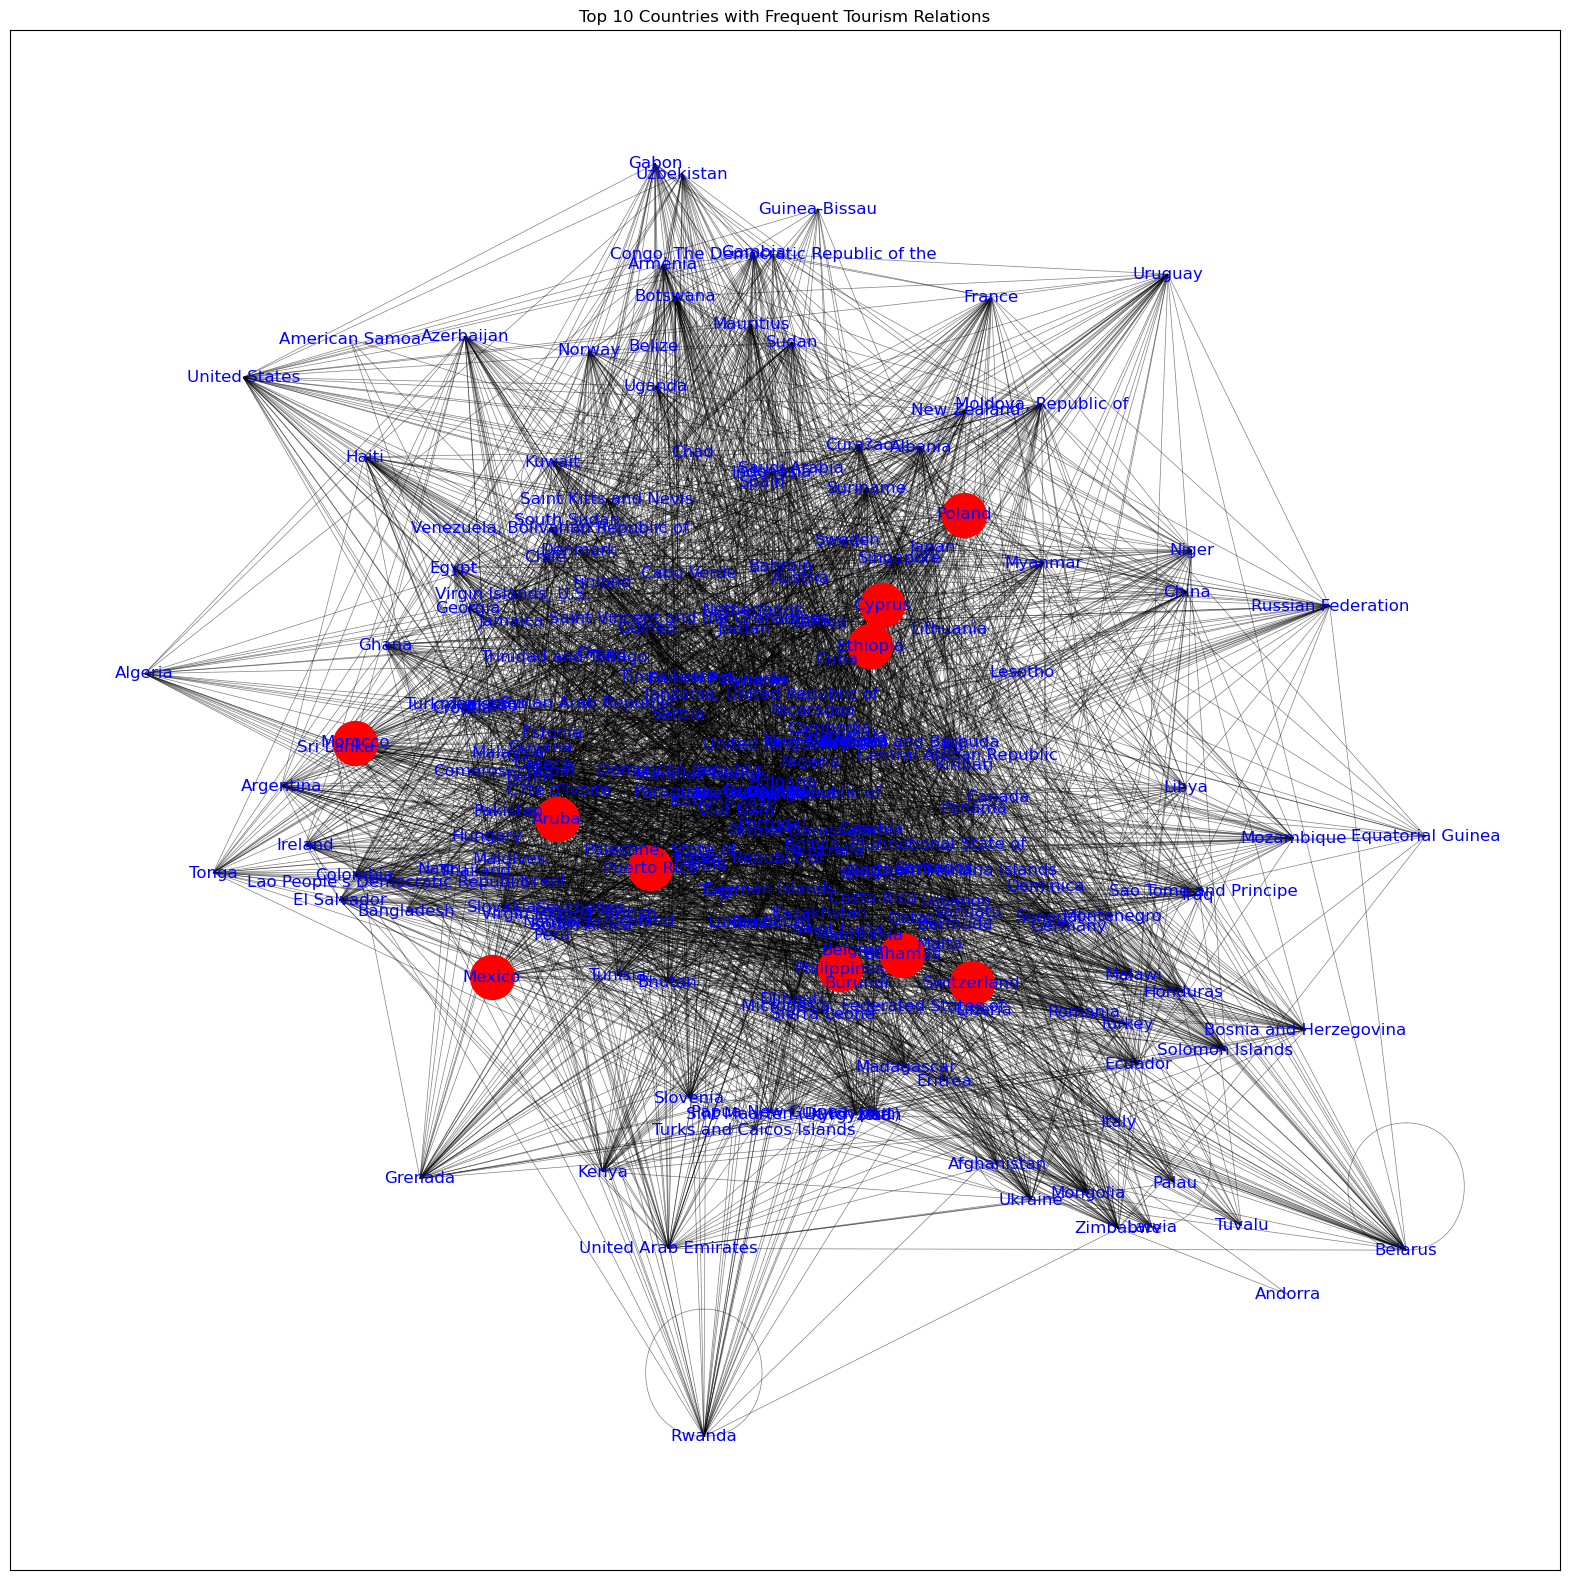

In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/A.csv', encoding = 'gb2312')  # 替换为你的数据文件名

# 建立网络模型
G = nx.Graph()

for index, row in data.iterrows():
    source = row['旅游出发国家']  # 替换为源国家字段名称
    target = row['旅游到达国家']  # 替换为目标国家字段名称
    weight = row['国际旅游人数']  # 替换为旅游人数字段名称
    
    G.add_edge(source, target, weight=weight)

# 分析频繁旅游关系
degree_centrality = nx.degree_centrality(G)
sorted_countries = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
top_countries = sorted_countries[:10]  # 取前10个最频繁的国家

# 找到最频繁的连接（边）
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
# print(sorted_edges[:10])
most_frequent_edge = sorted_edges[0]  # 最频繁的连接
most_frequent_countries = (most_frequent_edge[0], most_frequent_edge[1])  # 这两个国家之间的连接

print(top_countries)
print("Most frequent tourist connection:")
print(f"Country 1: {most_frequent_countries[0]}")
print(f"Country 2: {most_frequent_countries[1]}")
print(f"Tourists: {most_frequent_edge[2]['weight']}")


# 可视化
pos = nx.spring_layout(G)  # 定义节点布局

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, nodelist=top_countries, node_size=1000, node_color='r')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12,font_color='b')

plt.title('Top 10 Countries with Frequent Tourism Relations')
plt.show()
